<a href="https://colab.research.google.com/github/anjuli0802/CODSOFT-TASK_2_MOVIE_RATING_PREDICTION_WITH_PYTHON/blob/main/movieRatingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the Dependencies

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Collection

In [ ]:
movie_data = pd.read_csv("/content/IMDb_Movies_India[1].csv", encoding = 'latin-1')

##Data Preprocessing

In [ ]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
movie_data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
movie_data.shape

(15509, 10)

In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


##Evaluation of missing values

In [ ]:
movie_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

##Handling Missing Value

In [ ]:
movie_data['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [ ]:
# Remove commas from the specified column
movie_data['Genre'] = movie_data['Genre'].str.replace(',', '')

In [ ]:
movie_data['Genre'].unique()

array(['Drama', 'Drama Musical', 'Comedy Romance', 'Comedy Drama Musical',
       'Drama Romance War', 'Documentary', 'Horror Mystery Thriller',
       'Action Crime Thriller', 'Horror', 'Horror Romance Thriller',
       'Comedy Drama Romance', 'Thriller', 'Comedy Drama', nan,
       'Comedy Drama Fantasy', 'Comedy Drama Family',
       'Crime Drama Mystery', 'Horror Thriller', 'Biography',
       'Comedy Horror', 'Action', 'Drama Horror Mystery', 'Comedy',
       'Action Thriller', 'Drama History', 'Drama History Sport',
       'Horror Mystery Romance', 'Horror Mystery', 'Drama Horror Romance',
       'Action Drama History', 'Action Drama War', 'Comedy Family',
       'Adventure Horror Mystery', 'Action Sci-Fi',
       'Crime Mystery Thriller', 'War', 'Sport',
       'Biography Drama History', 'Horror Romance', 'Crime Drama',
       'Drama Romance', 'Adventure Drama', 'Comedy Mystery Thriller',
       'Action Crime Drama', 'Crime Thriller', 'Horror Sci-Fi Thriller',
       'Crime Dram

In [ ]:
movie_data.drop_duplicates(inplace = True)

In [ ]:
movie_data.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [ ]:
movie_data.shape

(15503, 10)

In [ ]:
movie_data.dropna(subset = ['Name', 'Year', 'Duration', 'Votes', 'Rating'], inplace = True)

In [ ]:
movie_data.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [ ]:
movie_data['Genre'].fillna(movie_data['Genre'].mode()[0], inplace =True)

In [ ]:
movie_data['Director'].value_counts()

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Dayanand                 1
Santosh Kashyap          1
Manav Kaul               1
Sajeev Balath            1
Mozez Singh              1
Name: Director, Length: 2549, dtype: int64

In [ ]:
movie_data.dropna(subset = ['Director'], inplace = True)

In [ ]:
movie_data.shape

(5850, 10)

In [ ]:
movie_data.dropna(subset = ['Actor 1', 'Actor 2', 'Actor 3'], inplace = True)

In [ ]:
movie_data.shape

(5688, 10)

##Converting Datatypes

In [ ]:
movie_data['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [ ]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',', '')
movie_data['Votes'] = movie_data['Votes'].astype(int)

In [ ]:
movie_data['Duration'].unique()

array(['109 min', '110 min', '147 min', '142 min', '82 min', '116 min',
       '96 min', '120 min', '161 min', '166 min', '102 min', '87 min',
       '132 min', '105 min', '146 min', '168 min', '158 min', '126 min',
       '94 min', '138 min', '124 min', '144 min', '157 min', '136 min',
       '107 min', '113 min', '80 min', '122 min', '149 min', '148 min',
       '130 min', '121 min', '188 min', '115 min', '103 min', '114 min',
       '170 min', '100 min', '99 min', '140 min', '128 min', '93 min',
       '125 min', '145 min', '75 min', '111 min', '134 min', '104 min',
       '92 min', '137 min', '127 min', '119 min', '135 min', '90 min',
       '150 min', '151 min', '95 min', '112 min', '143 min', '177 min',
       '117 min', '123 min', '72 min', '154 min', '175 min', '153 min',
       '78 min', '139 min', '133 min', '180 min', '46 min', '164 min',
       '162 min', '171 min', '160 min', '152 min', '163 min', '165 min',
       '141 min', '129 min', '156 min', '240 min', '172 min', '88

In [ ]:
movie_data['Duration'] = movie_data['Duration'].str.replace('min', '')
movie_data['Duration'] = movie_data['Duration'].astype(int)

In [ ]:
movie_data['Year'] = movie_data['Year'].str.replace('(', '')
movie_data['Year'] = movie_data['Year'].str.replace(')', '')
movie_data['Year'] = movie_data['Year'].astype(int)

<ipython-input-150-b28f66cff20b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_data['Year'] = movie_data['Year'].str.replace('(', '')
<ipython-input-150-b28f66cff20b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_data['Year'] = movie_data['Year'].str.replace(')', '')


##Data Visualization


In [ ]:
movie_nr = movie_data[['Name', 'Rating']]
movie_nr

,Name,Rating
1,#Gadhvi (He thought he was Gandhi),7.0
3,#Yaaram,4.4
5,...Aur Pyaar Ho Gaya,4.7
6,...Yahaan,7.4
8,?: A Question Mark,5.6
...,...,...
15493,Zubaan,6.1
15494,Zubeidaa,6.2
15503,Zulm Ki Zanjeer,5.8
15505,Zulmi,4.5


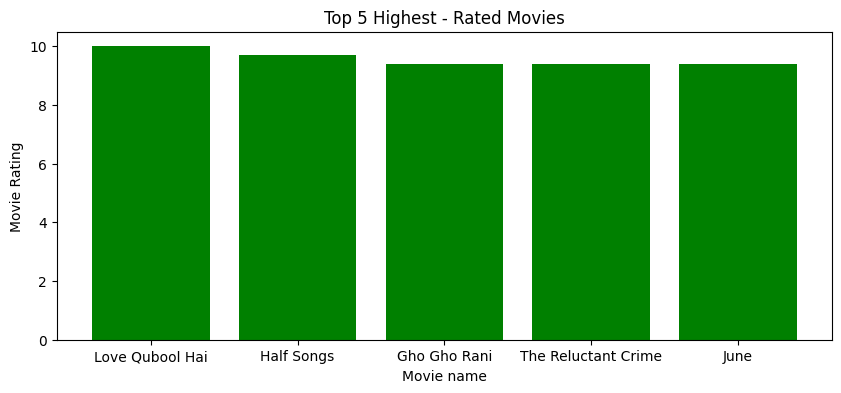

In [ ]:
top_rated_movies = movie_data.sort_values(by = 'Rating', ascending = False).head(5)
plt.figure(figsize = (10,4))
plt.bar(top_rated_movies['Name'], top_rated_movies['Rating'], color = 'green')
plt.xlabel('Movie name')
plt.ylabel('Movie Rating')
plt.title('Top 5 Highest - Rated Movies')
plt.show();

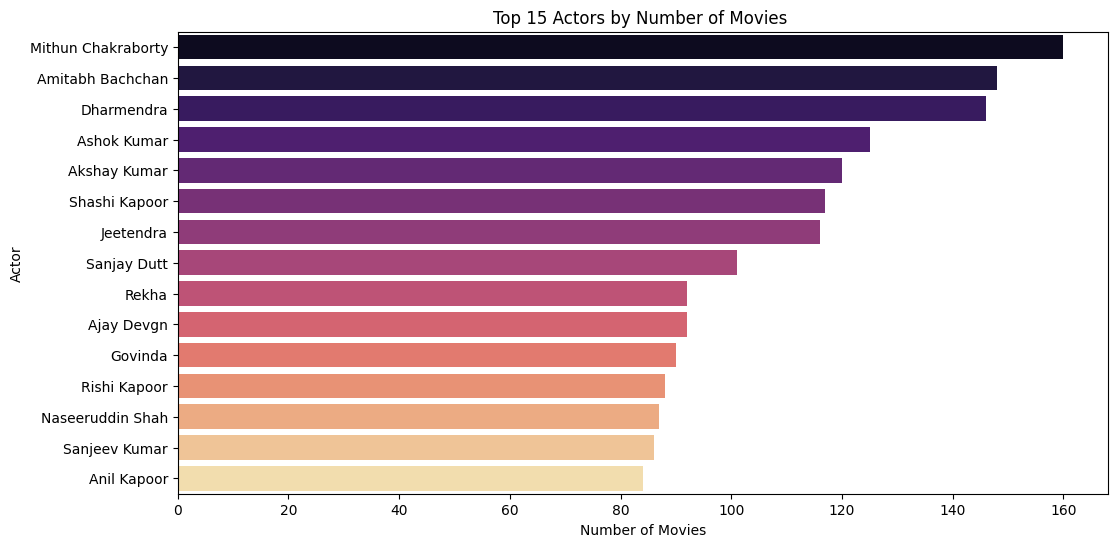

In [ ]:
movie_actors = pd.concat([movie_data['Actor 1'], movie_data['Actor 2'], movie_data['Actor 3']])
movie_actor_counts = movie_actors.value_counts().reset_index()
movie_actor_counts.columns = ['Actor', 'Number of movies']
plt.figure(figsize = (12,6))
sns.barplot(x = 'Number of movies', y = 'Actor', data = movie_actor_counts.head(15), palette = 'magma')
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top 15 Actors by Number of Movies ")
plt.show();

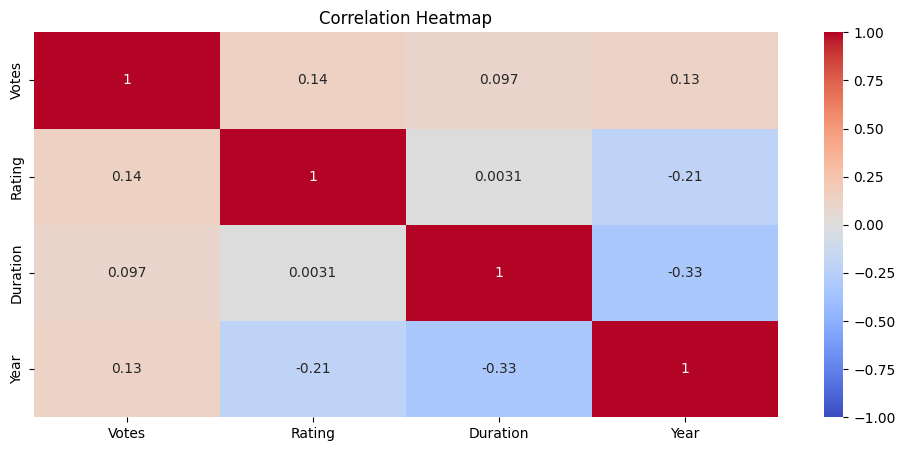

In [ ]:
movie_numerical_attributes = ['Votes', 'Rating', 'Duration', 'Year']
correlation_matrix = movie_data[movie_numerical_attributes].corr()
plt.figure(figsize = (12,5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show();

##Data Analysis

In [ ]:
movie_data.describe()

,Year,Duration,Rating,Votes
count,5688.000000,5688.000000,5688.000000,5688.000000
mean,1996.037623,133.486639,5.900738,2683.977848
std,19.977576,25.312671,1.379355,13617.991770
min,1931.000000,21.000000,1.100000,5.000000
25%,1982.000000,119.000000,5.000000,30.000000
50%,2001.000000,135.000000,6.100000,128.000000
75%,2013.000000,150.000000,6.900000,910.750000
max,2021.000000,321.000000,10.000000,591417.000000


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Duration'].plot(kind='hist', bins=20, title='Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Votes'].plot(kind='hist', bins=20, title='Votes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Duration', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Rating', y='Votes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Votes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Votes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Duration'].plot(kind='line', figsize=(8, 4), title='Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Votes'].plot(kind='line', figsize=(8, 4), title='Votes')
plt.gca().spines[['top', 'right']].set_visible(False)

##Splitting data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = movie_data[['Year', 'Duration', 'Votes']]
Y = movie_data['Rating']

In [ ]:
X

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,1086
8,2012,82,326
...,...,...,...
15493,2015,115,408
15494,2001,153,1496
15503,1989,125,44
15505,1999,129,655


In [ ]:
Y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5688, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

##Model Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mse = mean_absolute_error(Y_test, y_pred)
print("Mean absolute Error for test data is: ", mse)
rmse = mean_squared_error(Y_test, y_pred)
print("Mean squared error for test data is: ", rmse)
r2 = r2_score(Y_test, y_pred)
print("R2_Score for test data is: ", rmse)

Mean absolute Error for test data is:  1.03478714355866
Mean squared error for test data is:  1.687499234858382
R2_Score for test data is:  1.687499234858382


##Prediction Visualization

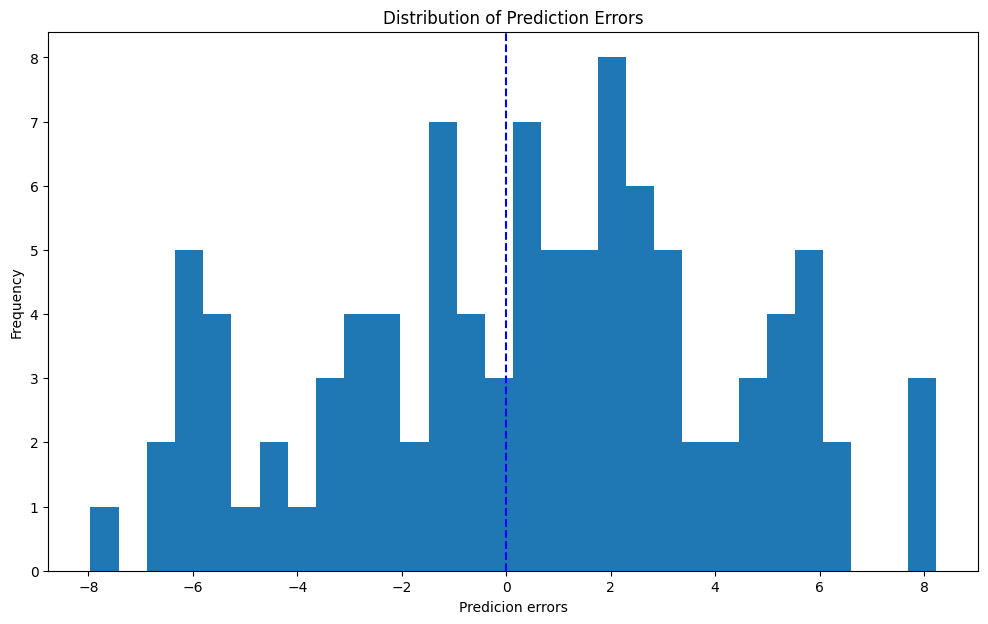

In [ ]:
Y_test = np.random.rand(100) * 10 #Actual Rating
y_pred = np.random.rand(100) * 10 #Predicted rating

errors = Y_test - y_pred
plt.figure(figsize = (12,7))

#Histogram

plt.hist(errors, bins = 30)
plt.xlabel('Predicion errors')
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.axvline(x = 0, color = 'b', linestyle = '--')
plt.show();